In [ ]:
import cv2
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

###Exp 1

11490434/11490434 [==============================] - 1s 0us/step


<ipython-input-5-0ae19afa30d1>:16: RuntimeWarning: overflow encountered in scalar add
  result[i, j] = min(image_6[i, j] + image_9[i, j], 255)


(-0.5, 27.5, 27.5, -0.5)

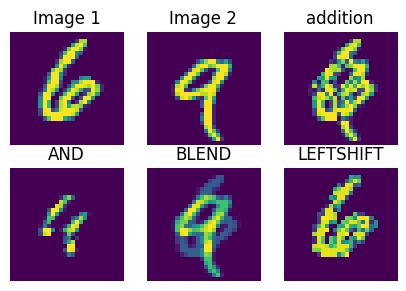

In [ ]:
#EXP 1

(X_train, y_train), (_, _) = mnist.load_data()

# Filter images with digits 6 and 9
idx_6 = (np.where(y_train==6)[0]) [0]  #or instead on last [0] you can also do #np.random.choice(idx_6) do chose a random image of the digit
idx_9 = (np.where(y_train==9)[0]) [0]

# Extract the images
image_6 = X_train[idx_6]
image_9 = X_train[idx_9]

result = np.zeros_like(image_6, dtype=np.uint8)
for i in range(image_6.shape[0]):
    for j in range(image_6.shape[1]):
        result[i, j] = min(image_6[i, j] + image_9[i, j], 255)

        #similaly -, *, &, \, ~, ^

        #result[i, j] = max(image_6[i, j] - image_9[i, j], 0)
        #result[i, j] = min(image_6[i, j] * image_9[i, j], 255)

        # if image_9[i, j] != 0:
        #     result[i, j] = image_6[i, j] / image_9[i, j]
        # else:
        #     result[i, j] = 0

result2=np.zeros_like(image_6,dtype=np.uint8)
for i in range(image_6.shape[0]):
  for j in range (image_6.shape[1]):
    result2[i,j]=image_6[i,j] & image_9[i,j]

result3=np.zeros_like(image_6,dtype=np.uint8)
for i in range(image_6.shape[0]):
  for j in range (image_6.shape[1]):
    result3[i,j]=0.3*image_6[i,j] + 0.7*image_9[i,j]


# Apply the left shift operation pixelwise on image_6
result4 = np.zeros_like(image_6)
for i in range(image_6.shape[0]):
    for j in range(image_6.shape[1]):
        result4[i, j] = image_6[i, j]<< 2


# Display the images and result
plt.figure(figsize=(5, 5))

plt.subplot(3,3, 1)
plt.imshow(image_6)
plt.title('Image 1')
plt.axis('off')

plt.subplot(3,3, 2)
plt.imshow(image_9)
plt.title('Image 2')
plt.axis('off')

plt.subplot(3,3, 3)
plt.imshow(result)
plt.title('addition')
plt.axis('off')

plt.subplot(3,3, 4)
plt.imshow(result2)
plt.title('AND')
plt.axis('off')

plt.subplot(3,3, 5)
plt.imshow(result3)
plt.title('BLEND')
plt.axis('off')

plt.subplot(3,3, 6)
plt.imshow(result4)
plt.title('LEFTSHIFT')
plt.axis('off')

In [ ]:
image=cv2.imread("/content/dogzie.jpeg")
image= cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.subplot(1,3, 1)
plt.imshow(image)
plt.title('OG')
plt.axis('off')

height, width, channels = image.shape
grayscale_image = np.zeros((height, width,channels), dtype=np.uint8)

for i in range(height):
    for j in range(width):
        pixel_value = (image[i][j][0] + image[i][j][1] +
                       image[i][j][2] )//3
        grayscale_image[i][j] = [(pixel_value),(pixel_value),(pixel_value)]

plt.subplot(1,3, 2)
plt.imshow(grayscale_image)
plt.title('grayscale')
plt.axis('off')

cropped= image[7:81, 7:91]

plt.subplot(1,3, 3)
plt.imshow(cropped)
plt.title('CROPPED')
plt.axis('off')


error: OpenCV(4.8.0) /io/opencv/modules/imgproc/src/color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'


###Exp 2 and 3

(-0.5, 27.5, 27.5, -0.5)

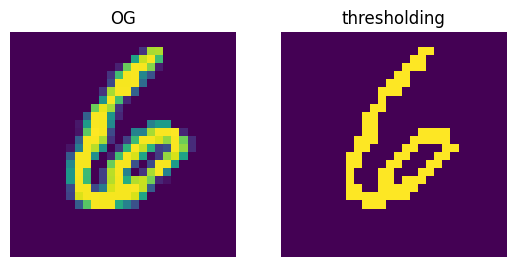

In [ ]:
#EXP 2

t=200
r=np.zeros_like(image_6,dtype=np.uint8)
for i in range(image_6.shape[0]):
  for j in range (image_6.shape[1]):

    pix=image_6[i,j]
    if(pix>=t):
      r[i,j]=255
    else:
      r[i,j]=0

plt.subplot(1,2, 1)
plt.imshow(image_6)
plt.title('OG')
plt.axis('off')

plt.subplot(1,2, 2)
plt.imshow(r)
plt.title('thresholding')
plt.axis('off')


### Exp 4

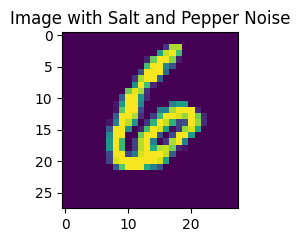

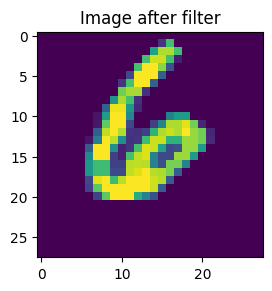

In [ ]:
#EXP 4

#salt pepper noise

imgcopy=image_6.copy()
salt_prob = 0.01  # Probability of adding salt noise
pepper_prob = 0.01  # Probability of adding pepper noise
row, col = imgcopy.shape
salt = np.ceil(salt_prob * row * col)
pepper = np.ceil(pepper_prob * row * col)

row_indices = np.random.randint(0, row, int(salt))
col_indices = np.random.randint(0, col, int(salt))
imgcopy[row_indices, col_indices]=0

row_indices1 = np.random.randint(0, row, int(pepper_prob))
col_indices1 = np.random.randint(0, col, int(pepper_prob))
imgcopy[row_indices1, col_indices1]=255

#apply fitler
img2 = np.zeros_like(imgcopy)
for i in range(len(imgcopy)-2):
  for j in range(len(imgcopy[0])-2):
    y = []
    for p in range(3):
      for q in range(3):
        y += [imgcopy[i+p][j+q]]
    img2[i][j] = sorted(y)[4]


plt.figure(figsize=(5, 10))

plt.subplot(1, 2, 1)
plt.imshow(imgcopy)
plt.title('Image with Salt and Pepper Noise')
plt.show()

plt.subplot(1, 2, 2)
plt.imshow(img2)
plt.title('Image after filter')
plt.show()



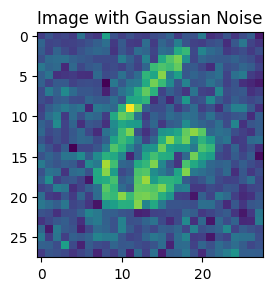

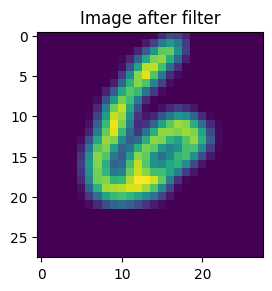

In [ ]:
noise = np.random.normal(scale = 50 , size = image_6.shape)

noisy_image = image_6 + noise


filteredimg = np.zeros_like(image_6)
for i in range(len(image_6)-2):
  for j in range(len(image_6[0])-2):
    x = 0
    for p in range(3):
      for q in range(3):
        x+= image_6[i+p][j+q]
    x = x//9
    filteredimg[i][j] = x
cv2_imshow(filteredimg)



plt.subplot(1, 2, 1)
plt.imshow(noisy_image)
plt.title('Image with Gaussian Noise')
plt.show()

plt.subplot(1, 2, 2)
plt.imshow(filteredimg)
plt.title('Image after filter')
plt.show()

###Exp 5

[[-1, -1, -1], [-1, 8, -1], [-1, -1, -1]]


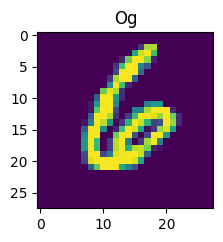

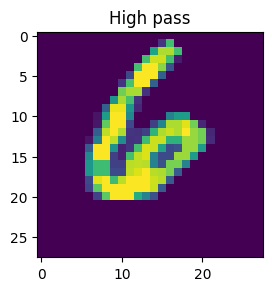

In [ ]:
result = np.zeros_like(image_6)
n=8
matrix= [[-1,-1,-1],[-1,n,-1],[-1,-1,-1]]
print(matrix)

for i in range(len(image_6)-2):
  for j in range(len(image_6)-2):
    x=0
    for p in range(3):
      for q in range(3):
        x+= image_6[i+p][j+q] * matrix[p][q]
    x = x//9
    result[i][j] = x

plt.figure(figsize=(5, 10))

plt.subplot(1, 2, 1)
plt.imshow(image_6)
plt.title('Og')
plt.show()

plt.subplot(1, 2, 2)
plt.imshow(img2)
plt.title('High pass')
plt.show()

###Exp 7

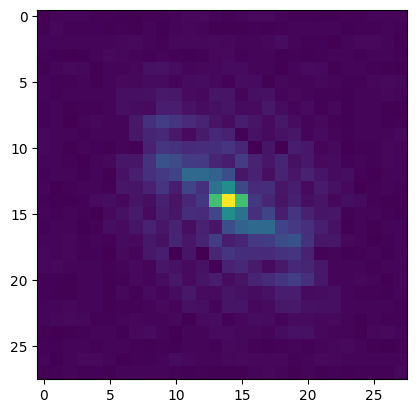

In [ ]:
image=image_6
ft_img = np.fft.fft2(image)
ft_img = np.fft.fftshift(ft_img)
plt.imshow(np.abs(ft_img))


In [ ]:

import math
def gaussian_high(d,d0):
  return (1 - math.exp(-d*d/(2*d0*d0)))
def gaussian_low(d,d0):
  return math.exp(-float(d*d)/float(2*d0*d0))
def Dis(x,y,u,v):
  x = np.sqrt(np.square(u-x)+np.square(v-y))
  return x
U = len(image)//2
V = len(image[0])//2
D0 = 6.0
mask = np.zeros_like(image)
for i in range(len(image)):
  for j in range(len(image[0])):
    if Dis(i,j,U,V)<= D0:
      mask[i][j] = 1
print(mask)
masked_img = ft_img*mask

ift_img = np.fft.ifftshift(masked_img)
ift_img = np.fft.ifft2(ift_img)


[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 

In [ ]:

mask = np.zeros_like(image, dtype = 'float32')
for i in range(len(image)):
  for j in range(len(image[0])):
    d = Dis(i,j,U,V)
    mask[i][j] = gaussian_high(d,D0)
mask

array([[0.99567974, 0.9937141 , 0.9911046 , 0.9877567 , 0.98361045,
        0.97866106, 0.9729782 , 0.9667193 , 0.9601336 , 0.953553  ,
        0.9473687 , 0.9419948 , 0.9378235 , 0.93517804, 0.93427145,
        0.93517804, 0.9378235 , 0.9419948 , 0.9473687 , 0.953553  ,
        0.9601336 , 0.9667193 , 0.9729782 , 0.97866106, 0.98361045,
        0.9877567 , 0.9911046 , 0.9937141 ],
       [0.9937141 , 0.990854  , 0.98705727, 0.98218614, 0.9761533 ,
        0.96895206, 0.9606835 , 0.9515769 , 0.9419948 , 0.9324201 ,
        0.9234219 , 0.9156029 , 0.9095337 , 0.90568465, 0.90436554,
        0.90568465, 0.9095337 , 0.9156029 , 0.9234219 , 0.9324201 ,
        0.9419948 , 0.9515769 , 0.9606835 , 0.96895206, 0.9761533 ,
        0.98218614, 0.98705727, 0.990854  ],
       [0.9911046 , 0.98705727, 0.9816844 , 0.97479105, 0.9662539 ,
        0.9560631 , 0.944362  , 0.9314749 , 0.917915  , 0.90436554,
        0.89163196, 0.880567  , 0.8719783 , 0.8665314 , 0.86466473,
        0.8665314 , 0.8719

###Exp 8

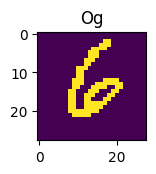

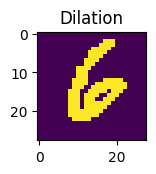

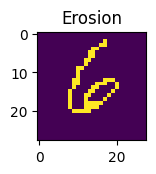

In [ ]:
se=[[1,1],[1,0]]
seed=255

#first convert greyscale to a binary image
bi_img=np.zeros_like(image_6,dtype=np.uint8)
t=150
for i in range(image_6.shape[0]):
  for j in range (image_6.shape[1]):
    pix=image_6[i,j]
    if(pix>=t):
      bi_img[i,j]=255
    else:
      bi_img[i,j]=0

#dilation
row,col=bi_img.shape
dil=np.zeros_like(bi_img)
for i in range(row-1):
  for j in range(col-1):
    if(bi_img[i][j]==seed):
      dil[i][j]=255
      dil[i+1][j]=255
      dil[i][j+1]=255

#erosion
row,col=bi_img.shape
ero=np.zeros_like(bi_img)
for i in range(row-1):
  for j in range(col-1):
    if(bi_img[i][j]==bi_img[i+1][j]==bi_img[i][j+1]==seed):
      ero[i][j]=255

# plt.figure(figsize=(10,10))

plt.subplot(3, 1, 1)
plt.imshow(bi_img)
plt.title('Og')
plt.show()

plt.subplot(3, 1, 2)
plt.imshow(dil)
plt.title('Dilation')
plt.show()

plt.subplot(3, 1, 3)
plt.imshow(ero)
plt.title('Erosion')
plt.show()



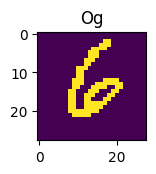

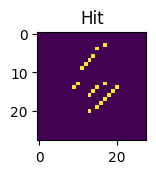

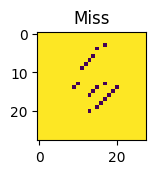

In [ ]:
#hit
hit=np.zeros_like(bi_img)
for i in range(row-1):
  for j in range(col-1):
    if(bi_img[i][j]==bi_img[i+1][j]==bi_img[i][j+1]==seed and bi_img[i+1][j+1]==0):
      hit[i][j]=255

#miss
miss=np.ones_like(bi_img)
for i in range(row-1):
  for j in range(col-1):
    if(bi_img[i][j]==bi_img[i+1][j]==bi_img[i][j+1]==seed and bi_img[i+1][j+1]==0):
      miss[i][j]=0

plt.subplot(3, 1, 1)
plt.imshow(bi_img)
plt.title('Og')
plt.show()

plt.subplot(3, 1, 2)
plt.imshow(hit)
plt.title('Hit')
plt.show()

plt.subplot(3, 1, 3)
plt.imshow(miss)
plt.title('Miss')
plt.show()

###Exp 9

In [ ]:
seed=